https://academic.oup.com/bib/article/17/5/808/2262333
Multiple Testing of Gene Sets from Gene Ontology: Possibilities and Pitfalls
Rosa J. Meijer, Jelle J. Goeman
Briefings in Bioinformatics, Volume 17, Issue 5, September 2016, Pages 808–818, https://doi.org/10.1093/bib/bbv091
Abstract
"The use of multiple testing procedures in the context of gene-set testing is an important but relatively underexposed topic. If a multiple testing method is used, this is usually a standard familywise error rate (FWER) or false discovery rate (FDR) controlling procedure in which the logical relationships that exist between the different (self-contained) hypotheses are not taken into account. Taking those relationships into account, however, can lead to more powerful variants of existing multiple testing procedures and can make summarizing and interpreting the final results easier. We will show that, from the perspective of interpretation as well as from the perspective of power improvement, FWER controlling methods are more suitable than FDR controlling methods. As an example of a possible power improvement, we suggest a modified version of the popular method by Holm, which we also implemented in the R package 'cherry'."
 . Holm [ 8 ] showed that power can be gained by transforming Bonferroni’s procedure into a sequentially rejective testing procedure. Suppose that Bonferroni’s procedure would result in k rejections, in Holm’s procedure the remaining n – k hypotheses are tested again but on an higher α -level, namely on α/(n−k)
 . Rejections thus lead to a higher chance of rejecting any of the remaining hypotheses. The procedure is iterated and stops if no new rejections are found.

Holm’s procedure was designed for the situation in which no logical relations are present among the hypotheses. If such logical relations do exist, however, the procedure can be further improved [ 22 ]. Given that an initial Bonferroni correction resulted in a rejection set R
 , Shaffer [ 22 ] proposed to test each remaining hypothesis in the set H∖R
 on
α/t(R)



https://academic.oup.com/bioinformatics/article/30/19/2747/2422190
Pashupati Mishra, Petri Törönen, Yrjö Leino, Liisa Holm 
Gene set analysis: limitations in popular existing methods and proposed improvements
Bioinformatics, Volume 30, Issue 19, October 2014, Pages 2747–2756, https://doi.org/10.1093/bioinformatics/btu374



In [222]:
# suppressPackageStartupMessages(library(tximport))
suppressPackageStartupMessages(library(readr))
# suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(scales))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(VennDiagram))
suppressPackageStartupMessages(library(limma))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(matrixStats))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(pheatmap))
# suppressPackageStartupMessages(library(goseq))
# suppressPackageStartupMessages(library(org.Hs.eg.db))
suppressPackageStartupMessages(library(dplyr))

suppressPackageStartupMessages({
    library(dplyr)
     library(Seurat)
#      library(Signac)
#     library("MAST")
    library(dplyr)
    library(ggplot2)
#     library(DESeq2)
#     library(MAST)
#     library(EnsDb.Hsapiens.v86)
    library(dplyr)
    library(ggplot2)
    library(ggrepel)
    library(Matrix)
#     library(harmony)
#     library(data.table)
#     library(ggpubr)
#     library(tictoc)
#     library(hdf5r)
#     library(ggthemes)
    library(RColorBrewer)
#     library(patchwork)
#     library(GenomicRanges)
#     library(future)
    library(cowplot)
#     library(limma)
#     library(scater)
# #     library(SeuratDisk)
})

suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tximport))
suppressPackageStartupMessages(library(readr))
suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(library(EnsDb.Hsapiens.v86))
suppressPackageStartupMessages(library(AnnotationHub))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(forcats))
suppressPackageStartupMessages(library(goseq))
suppressPackageStartupMessages(library(geneLenDataBase))
suppressPackageStartupMessages(library(org.Hs.eg.db))
suppressPackageStartupMessages(library(clusterProfiler))
suppressPackageStartupMessages(library(enrichplot))
suppressPackageStartupMessages(library(DOSE))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(TxDb.Hsapiens.UCSC.hg38.knownGene))
# library(tidyverse)
# library(hrbrthemes)
# library(tm)
# library(proustr)

In [223]:
up.pal <- brewer.pal(n = 6, name = "Reds")
down.pal <- brewer.pal(n = 6, name = "Blues")

,PathwayID,Pathway_Name,Topic,Class
,<chr>,<chr>,<chr>,<chr>
1,01100,Metabolic pathways,Metabolism,Global and overview maps
2,01110,Biosynthesis of secondary metabolites,Metabolism,Global and overview maps
3,01120,Microbial metabolism in diverse environments,Metabolism,Global and overview maps
4,01200,Carbon metabolism,Metabolism,Global and overview maps
5,01210,2-Oxocarboxylic acid metabolism,Metabolism,Global and overview maps
6,01212,Fatty acid metabolism,Metabolism,Global and overview maps


In [ ]:
kegg_anno <- read.table('/nfs/lab/projects/islet_multiomics_stress_CoCl2/ref/KEGG/KEGG_Pathways_annotations_for_IDs.txt', sep='\t', header=1, colClasses=c("character"))
head(kegg_anno)

In [224]:
nonintersect <- function(x, y) {
  sort(c(x[!x%in%y],
         y[!y%in%x]))
}

nonintersect_left <- function(x, y) {
  sort(c(x[!x%in%y]))
}

nonintersect_right <- function(x, y) {
  sort(c(
         y[!y%in%x]))
}

In [225]:
all_pseudobulk_seuratAggr <- read.table('/nfs/lab/jnewsome/CoCl2_Islet_Multiome/DESeq/DeSeqResults_DEalacarte/Pseudobulk_seuratAggregate/Treatments.allCelltypes.allGenesIncNonSig.txt')
all_pseudobulk_ruthAggr <- read.table('/nfs/lab/jnewsome/CoCl2_Islet_Multiome/DESeq/DeSeqResults_DEalacarte/Pseudobulk_ruthStyle/Treatments.allCelltypes.allGenesIncNonSig.txt') 
bulk38 <- read.table('/nfs/lab/jnewsome/CoCl2_Islet_Multiome/DESeq/DeSeqResults_DEalacarte/bulk_again2023_02_22/bulkRNA.hg38.fittypeLocal.cocl2.includingNAandNonSig.txt')
endoC_down <- read.table('/nfs/lab/projects/endoc_treatments/pipeline/RNA_deseq/CoCl2_all_down_degs.txt')
endoC_up <- read.table('/nfs/lab/projects/endoc_treatments/pipeline/RNA_deseq/CoCl2_all_up_degs.txt')
endoC <- rbind(endoC_up, endoC_down)

In [226]:
head(bulk38)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ensembl_GENE_ID,GENE_NAME
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSG00000100292.18,4100.0338,2.739606,0.11452333,23.92181,1.816431e-126,3.532049e-122,ENSG00000100292.18,HMOX1
ENSG00000148926.10,1876.9290,1.440883,0.09362305,15.39026,1.902667e-53,1.849868e-49,ENSG00000148926.10,ADM
ENSG00000167703.15,1482.1661,-1.255563,0.08511617,-14.75116,3.024090e-49,1.960114e-45,ENSG00000167703.15,SLC43A2
ENSG00000258667.3,223.4593,2.701661,0.19665287,13.73822,5.992894e-43,2.913295e-39,ENSG00000258667.3,HIF1A.AS3
ENSG00000115657.14,721.2842,1.069249,0.08091576,13.21434,7.251516e-40,2.820114e-36,ENSG00000115657.14,ABCB6
ENSG00000112164.6,953.8293,-1.229832,0.09394247,-13.09133,3.691041e-39,1.196205e-35,ENSG00000112164.6,GLP1R


In [227]:
rownames(bulk38)  = make.names(bulk38$GENE_NAME,unique=TRUE)


In [228]:
graphDiffInner <- function(dataA, dataB, nameA, nameB, variable, varName, varCutoff){
    varA <- dataA[c(variable)]
    varB <- dataB[c(variable)]
    varA$Genes <- rownames(varA)
    varB$Genes <- rownames(varB)
    merged <- merge(varA,varB,'Genes')
    colA <- paste0(nameA, '_', varName)
    colB <- paste0(nameB, '_', varName)
    colnames(merged) <- c('Genes',colA, colB)
    rownames(merged) <- merged$Genes
    merged$absdiff <- abs(merged[,2] - merged[,3])
    head(merged)
    
    options(repr.plot.width = 10, repr.plot.height =10)
    p <- ggplot(merged, aes_string(x=colA, y = colB)) + 
      geom_point() +
      geom_smooth() + 
    # p + geom_point()
    # p + geom_point() + 
      geom_label( 
        data=merged %>% filter(absdiff>varCutoff), # Filter data first
        aes(label=Genes),
          nudge_x  = .35,
          label.size = 0.25,
      )
    print(p)
}

graphDifferences <- function(dataA, dataB, nameA, nameB, fcCutoff, padjCutoff){
    
    
    graphDiffInner(dataA, dataB, nameA, nameB, 'log2FoldChange', 'L2FC', fcCutoff)
    graphDiffInner(dataA, dataB, nameA, nameB, 'padj', 'padj', padjCutoff)
    
}

getHighlyDifferentGeneNames <- function(dataA, dataB, nameA, nameB,fcCutoff){
#     'log2FoldChange', 'L2FC', 
    varA <- dataA[c('log2FoldChange')]
    varB <- dataB[c('log2FoldChange')]
    varA$Genes <- rownames(varA)
    varB$Genes <- rownames(varB)
    merged <- merge(varA,varB,'Genes')
    colA <- paste0(nameA, '_', 'L2FC')
    colB <- paste0(nameB, '_', 'L2FC')
    colnames(merged) <- c('Genes',colA, colB)
    rownames(merged) <- merged$Genes
    merged$absdiff <- abs(merged[,2] - merged[,3])
    head(merged)
    merged2  <- merged[which(merged$absdiff > fcCutoff),]
    print(merged2)
    return (merged2)
}


graphDiffInner_inverse <- function(dataA, dataB, nameA, nameB, variable, varName, varCutoff){
    varA <- dataA[c(variable)]
    varB <- dataB[c(variable)]
    varA$Genes <- rownames(varA)
    varB$Genes <- rownames(varB)
    merged <- merge(varA,varB,'Genes')
    colA <- paste0(nameA, '_', varName)
    colB <- paste0(nameB, '_', varName)
    colnames(merged) <- c('Genes',colA, colB)
    rownames(merged) <- merged$Genes
    merged$absdiff <- abs(merged[,2] - merged[,3])
    head(merged)
    
    options(repr.plot.width = 10, repr.plot.height =10)
    p <- ggplot(merged, aes_string(x=colA, y = colB)) + 
      geom_point() +
      geom_smooth() + 
    # p + geom_point()
    # p + geom_point() + 
      geom_label( 
        data=merged %>% filter(absdiff<varCutoff), # Filter data first
        aes(label=Genes),
          nudge_x  = .35,
          label.size = 0.25,
      )
    print(p)
}

graphDifferencesInverse <- function(dataA, dataB, nameA, nameB, fcCutoff, padjCutoff){
    
    
    graphDiffInner_inverse(dataA, dataB, nameA, nameB, 'log2FoldChange', 'L2FC', fcCutoff)
#     graphDiffInner(dataA, dataB, nameA, nameB, 'padj', 'padj', padjCutoff)
    
}





graphDiffInner_strong <- function(dataA, dataB, nameA, nameB, variable, varName, varCutoff){
    varA <- dataA[c(variable)]
    varB <- dataB[c(variable)]
    varA$Genes <- rownames(varA)
    varB$Genes <- rownames(varB)
    merged <- merge(varA,varB,'Genes')
    colA <- paste0(nameA, '_', varName)
    colB <- paste0(nameB, '_', varName)
    colnames(merged) <- c('Genes',colA, colB)
    rownames(merged) <- merged$Genes
    
    merged$absdiff <- abs(merged[,2] - merged[,3])
    merged$A <- merged[colA]
    merged$B <- merged[colB]
    head(merged)
    
    options(repr.plot.width = 10, repr.plot.height =10)
    p <- ggplot(merged, aes_string(x=colA, y = colB)) + 
      geom_point() +
      geom_smooth() + 
    # p + geom_point()
    # p + geom_point() + 
      geom_label( 
        data=merged %>% filter( A>varCutoff | B> varCutoff | A < (-varCutoff) | B < (-varCutoff)  ), # Filter data first
        aes(label=Genes),
          nudge_x  = .55,
          nudge_y  = .05,
          label.size = 0.25,
      )
    print(p)
}

graphDifferencesStrong <- function(dataA, dataB, nameA, nameB, fcCutoff, padjCutoff){
    
    
    graphDiffInner_strong(dataA, dataB, nameA, nameB, 'log2FoldChange', 'L2FC', fcCutoff)
#     graphDiffInner(dataA, dataB, nameA, nameB, 'padj', 'padj', padjCutoff)
    
}


addDEMatrixToList <- function(matrix, celltype_up_list_of_list_of_lists1, cellType){
    print(cellType)
    
    matrix <- matrix  %>% 
        mutate(diffexpressed_notSig = case_when(
            log2FoldChange > 0 &  padj >= 0.05 ~ 'UP_NOT_SIG',
            log2FoldChange < 0 &  padj >= 0.05 ~ 'DOWN_NOT_SIG',
            log2FoldChange > 0 &  padj < 0.05 ~ 'UP',
            log2FoldChange < 0 &  padj < 0.05 ~ 'DOWN',
            TRUE ~ 'No_Change'
        ))


    matrix <- matrix  %>% 
            mutate(diffexpressed = case_when(
                log2FoldChange > 0 &  padj < 0.05 ~ 'UP',
                log2FoldChange < 0 &  padj < 0.05 ~ 'DOWN',
                TRUE ~ 'No_Change'
            ))
    celltype_up_list_of_list_of_lists[['All_Genes_And_NA.']][[cellType]] = matrix

    a <-  matrix
    rows1 <- rownames(a)
    rows2 <- rows1[grep("^NA.*", rows1)]
    a <- a[!rownames(a) %in% rows2, ]
    #     dim(bulk382)
    matrix <- a
    
    celltype_up_list_of_list_of_lists[['All_Genes']][[cellType]] = matrix
#     print(head(celltype_up_list_of_list_of_lists[['All_Genes']][[cellType]]))
    return (celltype_up_list_of_list_of_lists1)
}


addDEMatrixToList_All_Genes_And_NA <- function(matrix, cellType){
#     print(cellType)
    
    matrix <- matrix  %>% 
        mutate(diffexpressed_notSig = case_when(
            log2FoldChange > 0 &  padj >= 0.05 ~ 'UP_NOT_SIG',
            log2FoldChange < 0 &  padj >= 0.05 ~ 'DOWN_NOT_SIG',
            log2FoldChange > 0 &  padj < 0.05 ~ 'UP',
            log2FoldChange < 0 &  padj < 0.05 ~ 'DOWN',
            TRUE ~ 'No_Change'
        ))


    matrix <- matrix  %>% 
            mutate(diffexpressed = case_when(
                log2FoldChange > 0 &  padj < 0.05 ~ 'UP',
                log2FoldChange < 0 &  padj < 0.05 ~ 'DOWN',
                TRUE ~ 'No_Change'
            ))
    return (matrix)
}


addDEMatrixToList_All_Genes <- function(matrix, cellType){
#     print(cellType)
  
    a <-  matrix
    rows1 <- rownames(a)
    rows2 <- rows1[grep("^NA.*", rows1)]
    a <- a[!rownames(a) %in% rows2, ]
    #     dim(bulk382)
    matrix <- a
    
    return (matrix)
}





In [229]:
INDIR <- '/nfs/lab/jnewsome/CoCl2_Islet_Multiome/DESeq/DeSeqResults_DEalacarte/Pseudobulk_ruthStyle/'
infilesuffix <- '.allGenesIncNonSig.txt'
celltypes <- c('Acinar', 'Alpha', 'Beta', 'Delta', 'Ductal', 
'Endothelial', 'Gamma', 'Immune.Mast', 'Immune', 
'Polyhormonal', 'Stellate')

celltypes_and_others <- c('Acinar', 'Alpha', 'Beta', 'Delta', 'Ductal', 
'Endothelial', 'Gamma', 'Immune.Mast', 'Immune', 
'Polyhormonal', 'Stellate', 'All_PseudoBulk', 'Bulk', 'EndoC')



threshes = c(0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4)


celltype_up_list_of_list_of_lists = list()
celltype_up_list_of_list_of_lists[['All_Genes_And_NA.']] = list()
celltype_up_list_of_list_of_lists[['All_Genes']] = list()
celltype_up_list_of_list_of_lists[['Sig_Genes']] = list()
celltype_up_list_of_list_of_lists[['UP_Sig_Genes']] = list()
celltype_up_list_of_list_of_lists[['DOWN_Sig_Genes']] = list()
celltype_up_list_of_list_of_lists[['UP_NotSig_Genes']] = list()
celltype_up_list_of_list_of_lists[['DOWN_NotSig_Genes']] = list()
celltype_up_list_of_list_of_lists[['UP_Sig_Genes_Thresholds']] = list()
celltype_up_list_of_list_of_lists[['DOWN_Sig_Genes_Thresholds']] = list()



for (celltype in celltypes){
    filename <- paste0(INDIR, celltype, infilesuffix)
    TABLE <- read.table(filename)
    celltype_up_list_of_list_of_lists[['All_Genes_And_NA.']][[celltype]] <- addDEMatrixToList_All_Genes_And_NA(TABLE, celltype)
    celltype_up_list_of_list_of_lists[['All_Genes']][[celltype]] = addDEMatrixToList_All_Genes(
                            celltype_up_list_of_list_of_lists[['All_Genes_And_NA.']][[celltype]], celltype)
    
    print(head(celltype_up_list_of_list_of_lists[['All_Genes']][[celltype]]))
}

####################################
celltype_up_list_of_list_of_lists[['All_Genes_And_NA.']][['Bulk']] <- addDEMatrixToList_All_Genes_And_NA(bulk38, 'Bulk')
    celltype_up_list_of_list_of_lists[['All_Genes']][['Bulk']] = addDEMatrixToList_All_Genes(
                            celltype_up_list_of_list_of_lists[['All_Genes_And_NA.']][['Bulk']], 'Bulk')

#################################################
    celltype_up_list_of_list_of_lists[['All_Genes_And_NA.']][['EndoC']] <- addDEMatrixToList_All_Genes_And_NA(endoC, 'EndoC')
    celltype_up_list_of_list_of_lists[['All_Genes']][['EndoC']] = addDEMatrixToList_All_Genes(
                            celltype_up_list_of_list_of_lists[['All_Genes_And_NA.']][['EndoC']], 'EndoC')

########################
    celltype_up_list_of_list_of_lists[['All_Genes_And_NA.']][['All_PseudoBulk']] <- addDEMatrixToList_All_Genes_And_NA(all_pseudobulk_ruthAggr, 'All_PseudoBulk')
    celltype_up_list_of_list_of_lists[['All_Genes']][['All_PseudoBulk']] = addDEMatrixToList_All_Genes(
                            celltype_up_list_of_list_of_lists[['All_Genes_And_NA.']][['All_PseudoBulk']], 'All_PseudoBulk')
celltype_up_list_of_list_of_lists[['All_Genes_And_NA.']][['Bulk']] <- addDEMatrixToList_All_Genes_And_NA(bulk38, 'Bulk')
    celltype_up_list_of_list_of_lists[['All_Genes']][['Bulk']] = addDEMatrixToList_All_Genes(
                            celltype_up_list_of_list_of_lists[['All_Genes_And_NA.']][['Bulk']], 'Bulk')
# head(listOfListsOfLists[['EndoC']][['All_Genes']])
for (celltype in celltypes_and_others){
    TABLE <- celltype_up_list_of_list_of_lists[['All_Genes']][[celltype]]
    TABLE$Genes <- rownames(TABLE)
#     print(celltype)
#     head(TABLE)
    celltype_up_list_of_list_of_lists[['All_Genes']][[celltype]] <- TABLE
    TABLE <- celltype_up_list_of_list_of_lists[['All_Genes']][[celltype]]
    
    TABLE_SIG <- TABLE[which(TABLE$padj < 0.05),]
#     print(head(TABLE_SIG))
    TABLE_NOTSIG <- TABLE[which(TABLE$padj >= 0.05),]
    celltype_up_list_of_list_of_lists[['Sig_Genes']][[celltype]] = TABLE_SIG
    celltype_up_list_of_list_of_lists[['DOWN_Sig_Genes']][[celltype]] = TABLE_SIG[which(TABLE_SIG$log2FoldChange < 0),]
    celltype_up_list_of_list_of_lists[['UP_Sig_Genes']][[celltype]] = TABLE_SIG[which(TABLE_SIG$log2FoldChange > 0),]
    celltype_up_list_of_list_of_lists[['UP_NotSig_Genes']][[celltype]] = TABLE_NOTSIG[which(TABLE_NOTSIG$log2FoldChange > 0),]
    celltype_up_list_of_list_of_lists[['DOWN_NotSig_Genes']][[celltype]] = TABLE_NOTSIG[which(TABLE_NOTSIG$log2FoldChange < 0),]
    
    
    celltype_up_list_of_list_of_lists[['UP_Sig_Genes_Thresholds']][[celltype]] = list()
    for (thresh in threshes){
        threshS = as.character(thresh)
        
        celltype_up_list_of_list_of_lists[['UP_Sig_Genes_Thresholds']][[celltype]][[threshS]] = TABLE_SIG[which(TABLE_SIG$log2FoldChange > thresh),]
        celltype_up_list_of_list_of_lists[['DOWN_Sig_Genes_Thresholds']][[celltype]][[threshS]] = TABLE_SIG[which(TABLE_SIG$log2FoldChange < (-thresh)),]
    }
    
}

         baseMean log2FoldChange     lfcSE     stat       pvalue        padj
AKR1C1  31.134081       1.902450 0.3946878 4.820139 1.434583e-06 0.007356544
FOSL1    3.023568       4.191175 0.9333114 4.490650 7.100626e-06 0.018206004
ABCC3   30.284330       1.599663 0.3709322 4.312549 1.613830e-05 0.027585730
SLCO2A1  4.918154       3.551011 0.8439786 4.207466 2.582505e-05 0.030358184
PVT1     6.818490       2.528728 0.6054631 4.176519 2.960041e-05 0.030358184
SHC3     4.083619       3.392719 0.8536989 3.974140 7.063410e-05 0.053454936
        diffexpressed_notSig diffexpressed
AKR1C1                    UP            UP
FOSL1                     UP            UP
ABCC3                     UP            UP
SLCO2A1                   UP            UP
PVT1                      UP            UP
SHC3              UP_NOT_SIG     No_Change
            baseMean log2FoldChange     lfcSE     stat       pvalue
FGG         24.96972       4.630423 0.7008280 6.607074 3.919891e-11
BNIP3L      89.74805    

In [230]:
listOfListsOfLists = list()

for (celltype in celltypes_and_others){
    listOfListsOfLists[[celltype]] = list()
    listOfListsOfLists[[celltype]][['All_Genes']] = celltype_up_list_of_list_of_lists[['All_Genes']][[celltype]]
    listOfListsOfLists[[celltype]][['Sig_Genes']] = celltype_up_list_of_list_of_lists[['Sig_Genes']][[celltype]]
    listOfListsOfLists[[celltype]][['UP_Sig_Genes']] = celltype_up_list_of_list_of_lists[['UP_Sig_Genes']][[celltype]]
    listOfListsOfLists[[celltype]][['DOWN_Sig_Genes']] = celltype_up_list_of_list_of_lists[['DOWN_Sig_Genes']][[celltype]]
    listOfListsOfLists[[celltype]][['UP_NotSig_Genes']] = celltype_up_list_of_list_of_lists[['UP_NotSig_Genes']][[celltype]]
    listOfListsOfLists[[celltype]][['DOWN_NotSig_Genes']] = celltype_up_list_of_list_of_lists[['DOWN_NotSig_Genes']][[celltype]]
    listOfListsOfLists[[celltype]][['UP_Sig_Genes_Thresholds']] = celltype_up_list_of_list_of_lists[['UP_Sig_Genes_Thresholds']][[celltype]]
    listOfListsOfLists[[celltype]][['DOWN_Sig_Genes_Thresholds']] = celltype_up_list_of_list_of_lists[['DOWN_Sig_Genes_Thresholds']][[celltype]]    
}





In [231]:
# head(listOfListsOfLists[['Bulk']][['All_Genes']])

In [232]:
# head(listOfListsOfLists[['All_PseudoBulk']][['Sig_Genes']])

In [233]:
cols1 <- c('CellType', 'All_Genes_Tested', 'SigCount', 
                  'UpSigCount', 'DownSigCount',
                  'UpNotSigCount', 'DownNotSigCount'
          
          )

summaryCounts <- data.frame(matrix(ncol = length(cols1), nrow = 0))

colnames(summaryCounts) <- cols1


i = 1
for (celltype in celltypes_and_others){
    celltypeList = listOfListsOfLists[[celltype]]
    nAll = length(rownames(celltypeList[['All_Genes']]))
    nSig = length(rownames(celltypeList[['Sig_Genes']]))
    nDown = length(rownames(celltypeList[['DOWN_Sig_Genes']]))
    nUp = length(rownames(celltypeList[['UP_Sig_Genes']]))
    nDown_notsig = length(rownames(celltypeList[['DOWN_NotSig_Genes']]))
    nUp_notsig = length(rownames(celltypeList[['UP_NotSig_Genes']]))
    
    
    rowlist <- list()
    rowlist <- append(rowlist,celltype)
    rowlist <- append(rowlist,nAll)
    rowlist <- append(rowlist,nSig)
    rowlist <- append(rowlist,nUp)
    rowlist <- append(rowlist,nDown)
    rowlist <- append(rowlist,nUp_notsig)
    rowlist <- append(rowlist,nDown_notsig)
    


    summaryCounts[i,] <- rowlist
    
    i = i + 1
    
}

In [234]:
head(summaryCounts)

,CellType,All_Genes_Tested,SigCount,UpSigCount,DownSigCount,UpNotSigCount,DownNotSigCount
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Acinar,36506,5,5,0,2654,2448
2,Alpha,36506,83,58,25,3896,4237
3,Beta,36506,272,124,148,3427,3479
4,Delta,36506,17,15,2,2613,3074
5,Ductal,36506,3,1,2,2189,2572
6,Endothelial,36506,0,0,0,5242,9279


In [235]:
colnames(summaryCounts)

[1] "CellType"         "All_Genes_Tested" "SigCount"         "UpSigCount"      
[5] "DownSigCount"     "UpNotSigCount"    "DownNotSigCount"

In [236]:
rownames(summaryCounts)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"

In [237]:
summaryCounts2 <- summaryCounts[,c('CellType','All_Genes_Tested','SigCount','UpSigCount','DownSigCount','UpNotSigCount','DownNotSigCount'),]
rownames(summaryCounts2) <- summaryCounts2$CellType
summaryCounts2$CellType <- NULL
summaryCounts2

,All_Genes_Tested,SigCount,UpSigCount,DownSigCount,UpNotSigCount,DownNotSigCount
,<int>,<int>,<int>,<int>,<int>,<int>
Acinar,36506,5,5,0,2654,2448
Alpha,36506,83,58,25,3896,4237
Beta,36506,272,124,148,3427,3479
Delta,36506,17,15,2,2613,3074
Ductal,36506,3,1,2,2189,2572
Endothelial,36506,0,0,0,5242,9279
Gamma,36506,1,0,1,15603,3195
Immune.Mast,36506,0,0,0,2480,7709
Immune,36506,0,0,0,4835,8065


[1] "ENSG00000100292" "ENSG00000148926" "ENSG00000167703" "ENSG00000258667"
[5] "ENSG00000115657" "ENSG00000112164"

[1] "ENSG00000100292" "ENSG00000148926" "ENSG00000167703" "ENSG00000258667"
[5] "ENSG00000115657" "ENSG00000112164"

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ensembl_GENE_ID,GENE_NAME,diffexpressed_notSig,diffexpressed,Genes,GENE_YES
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
ENSG00000100292,4100.0338,2.739606,0.11452333,23.92181,1.816431e-126,3.532049e-122,ENSG00000100292.18,HMOX1,UP,UP,HMOX1,1
ENSG00000148926,1876.9290,1.440883,0.09362305,15.39026,1.902667e-53,1.849868e-49,ENSG00000148926.10,ADM,UP,UP,ADM,1
ENSG00000167703,1482.1661,-1.255563,0.08511617,-14.75116,3.024090e-49,1.960114e-45,ENSG00000167703.15,SLC43A2,DOWN,DOWN,SLC43A2,1
ENSG00000258667,223.4593,2.701661,0.19665287,13.73822,5.992894e-43,2.913295e-39,ENSG00000258667.3,HIF1A.AS3,UP,UP,HIF1A.AS3,1
ENSG00000115657,721.2842,1.069249,0.08091576,13.21434,7.251516e-40,2.820114e-36,ENSG00000115657.14,ABCB6,UP,UP,ABCB6,1
ENSG00000112164,953.8293,-1.229832,0.09394247,-13.09133,3.691041e-39,1.196205e-35,ENSG00000112164.6,GLP1R,DOWN,DOWN,GLP1R,1


[1] "Bulk UP"


Can't find hg38/ensGene length data in genLenDataBase...

Warning message in grep(txdbPattern, installedPackages):
"argument 'pattern' has length > 1 and only the first element will be used"
Found the annotation package, TxDb.Hsapiens.UCSC.hg38.knownGene

Trying to get the gene lengths from it.

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 12470 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "Bulk DOWN"


Can't find hg38/ensGene length data in genLenDataBase...

Warning message in grep(txdbPattern, installedPackages):
"argument 'pattern' has length > 1 and only the first element will be used"
Found the annotation package, TxDb.Hsapiens.UCSC.hg38.knownGene

Trying to get the gene lengths from it.

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 12470 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "Bulk UP"
[1] "Bulk Metabolism"
[1] "Bulk Genetic Information Processing"
[1] "Bulk Environmental Information Processing"
[1] "Bulk Cellular Processes"
[1] "Bulk Organismal Systems"
[1] "Bulk Human Diseases"
[1] "Bulk Drug Development"


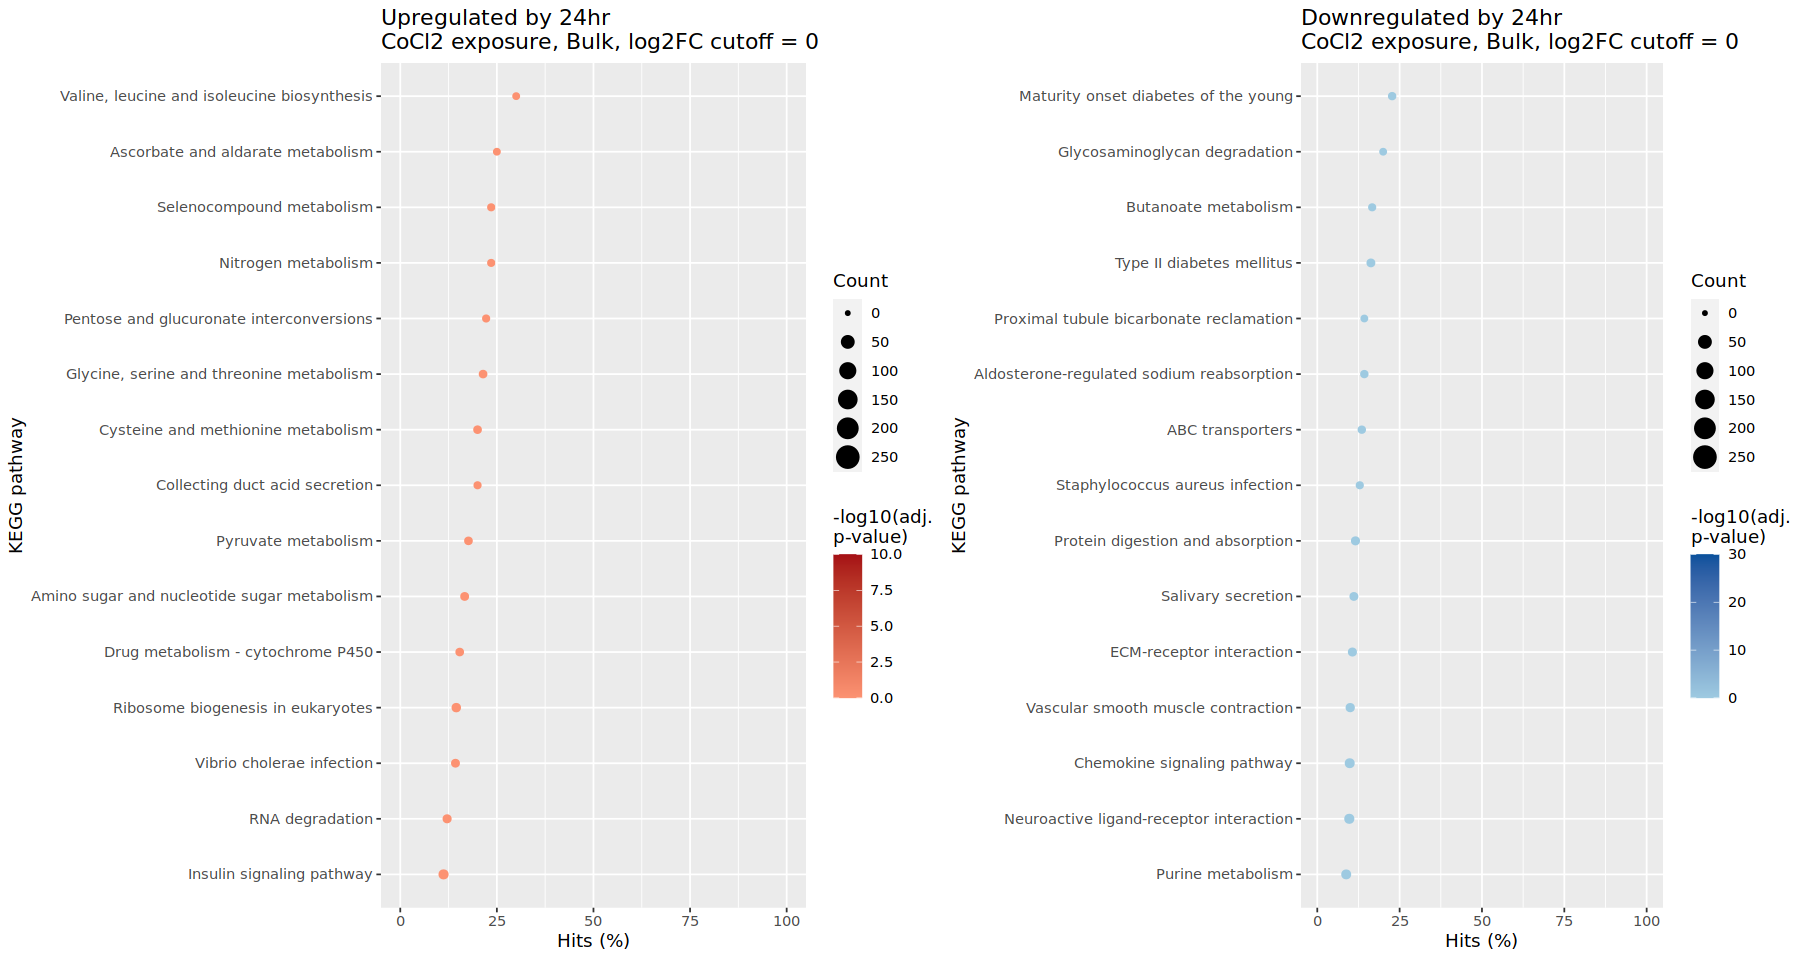

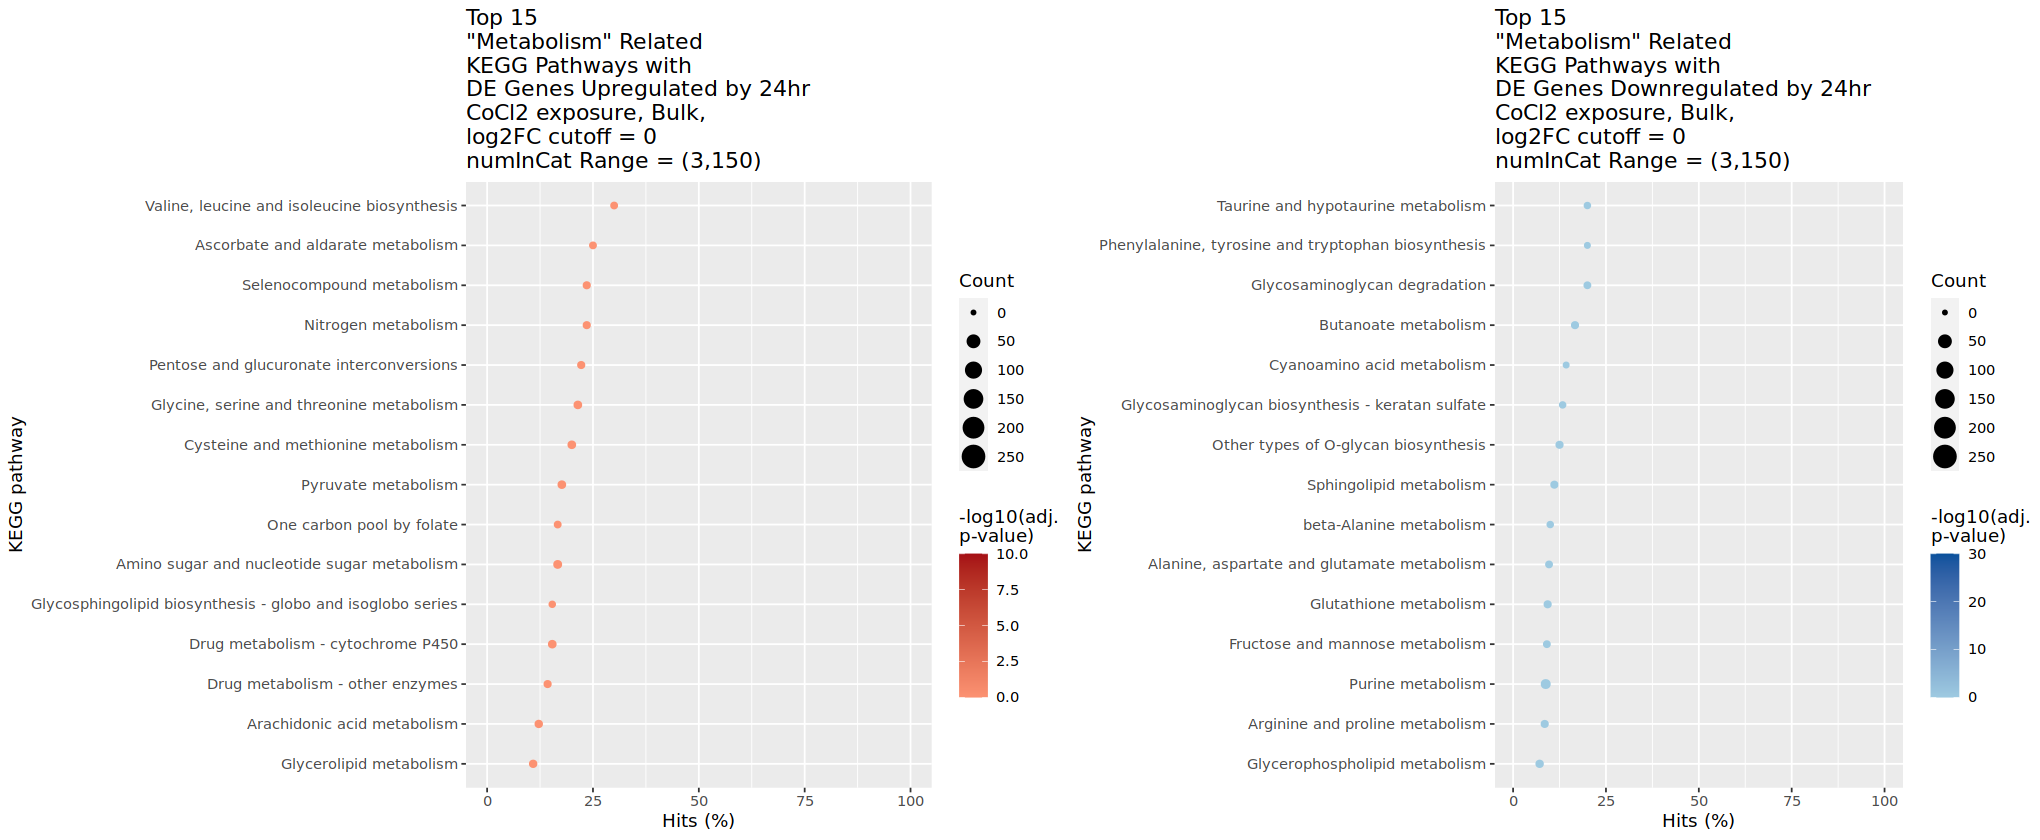

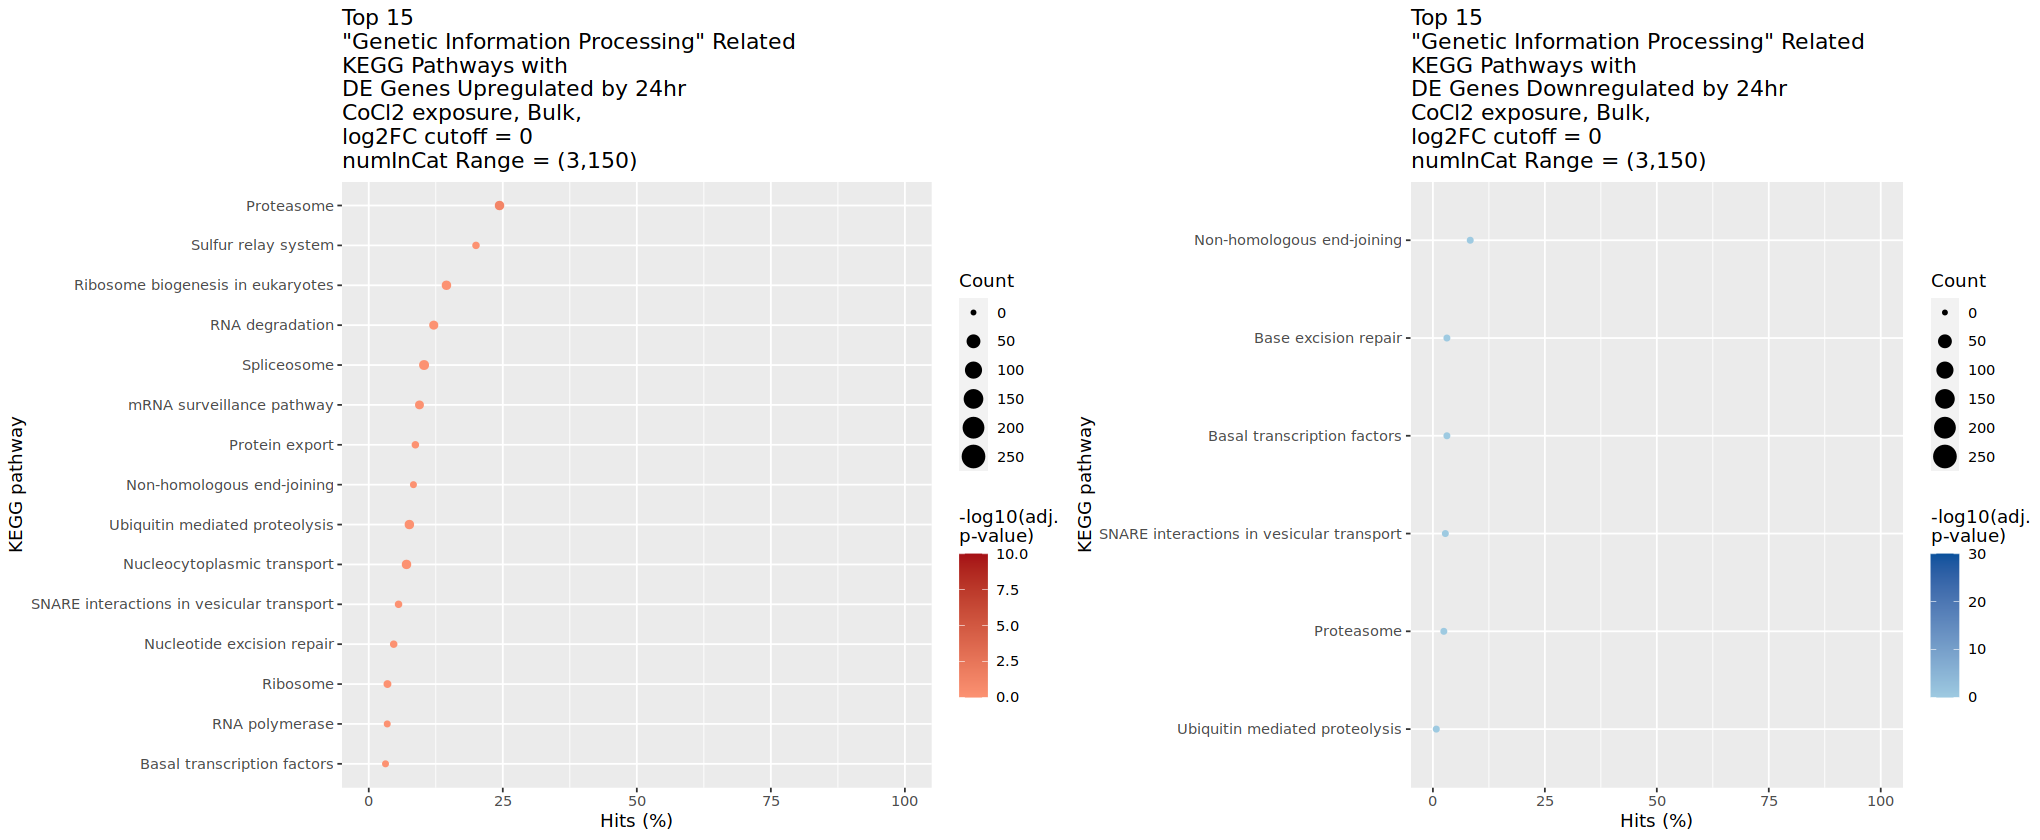

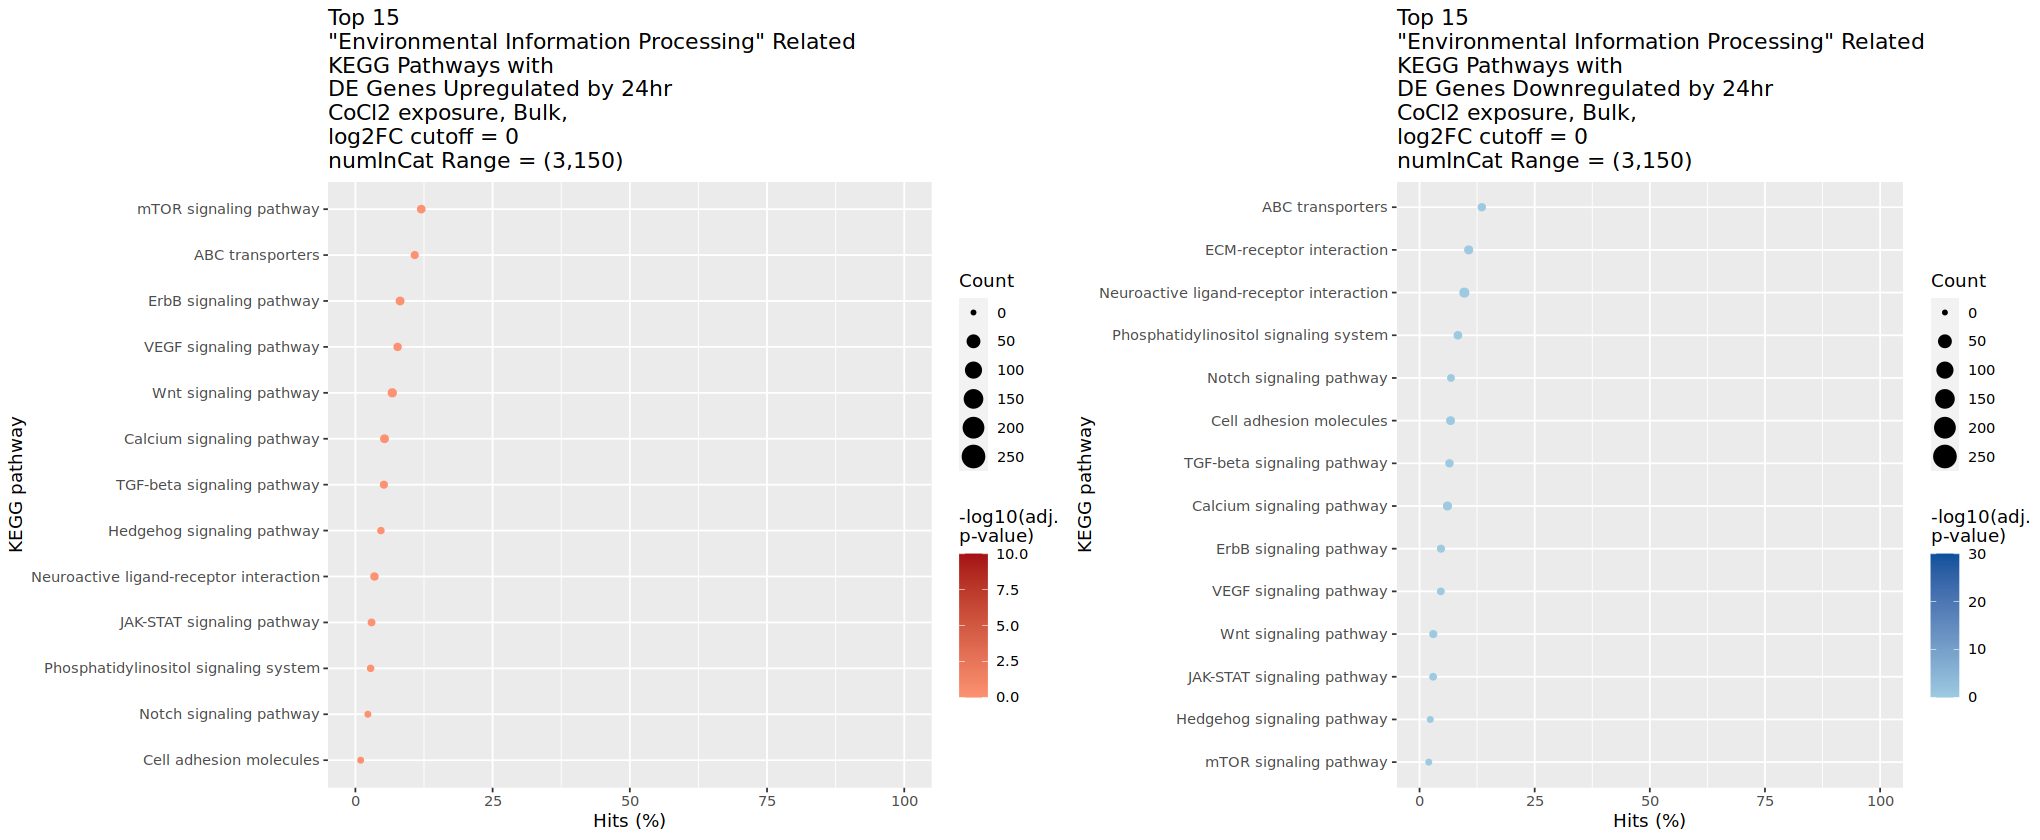

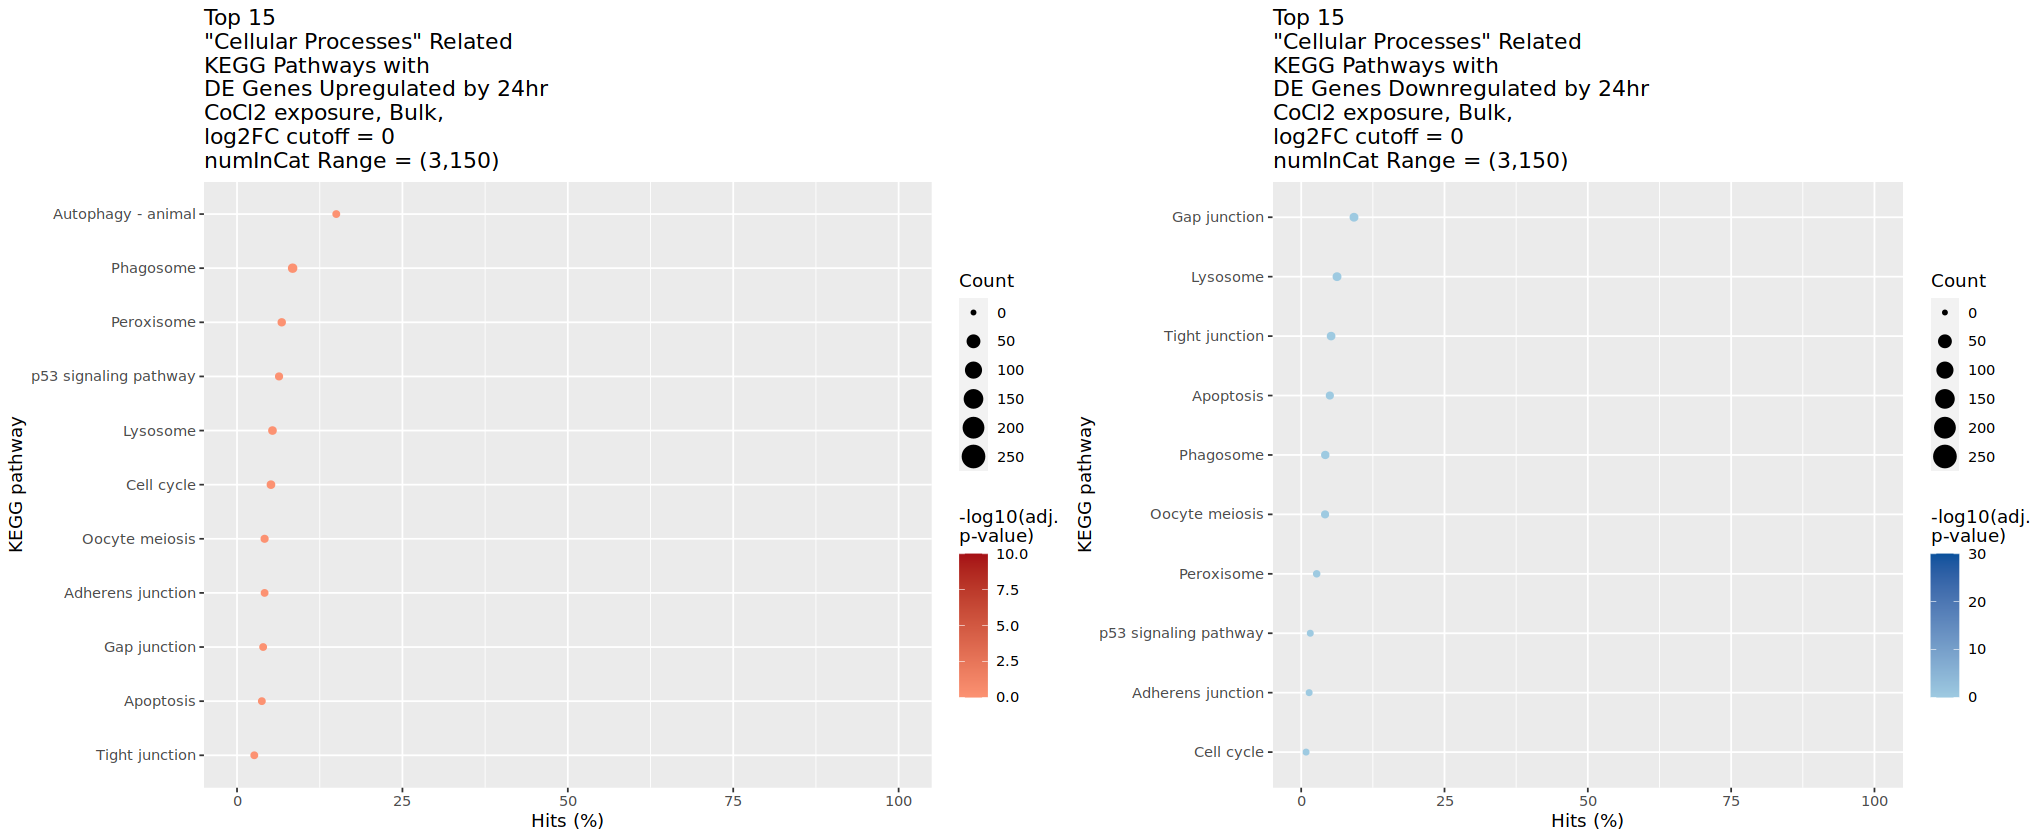

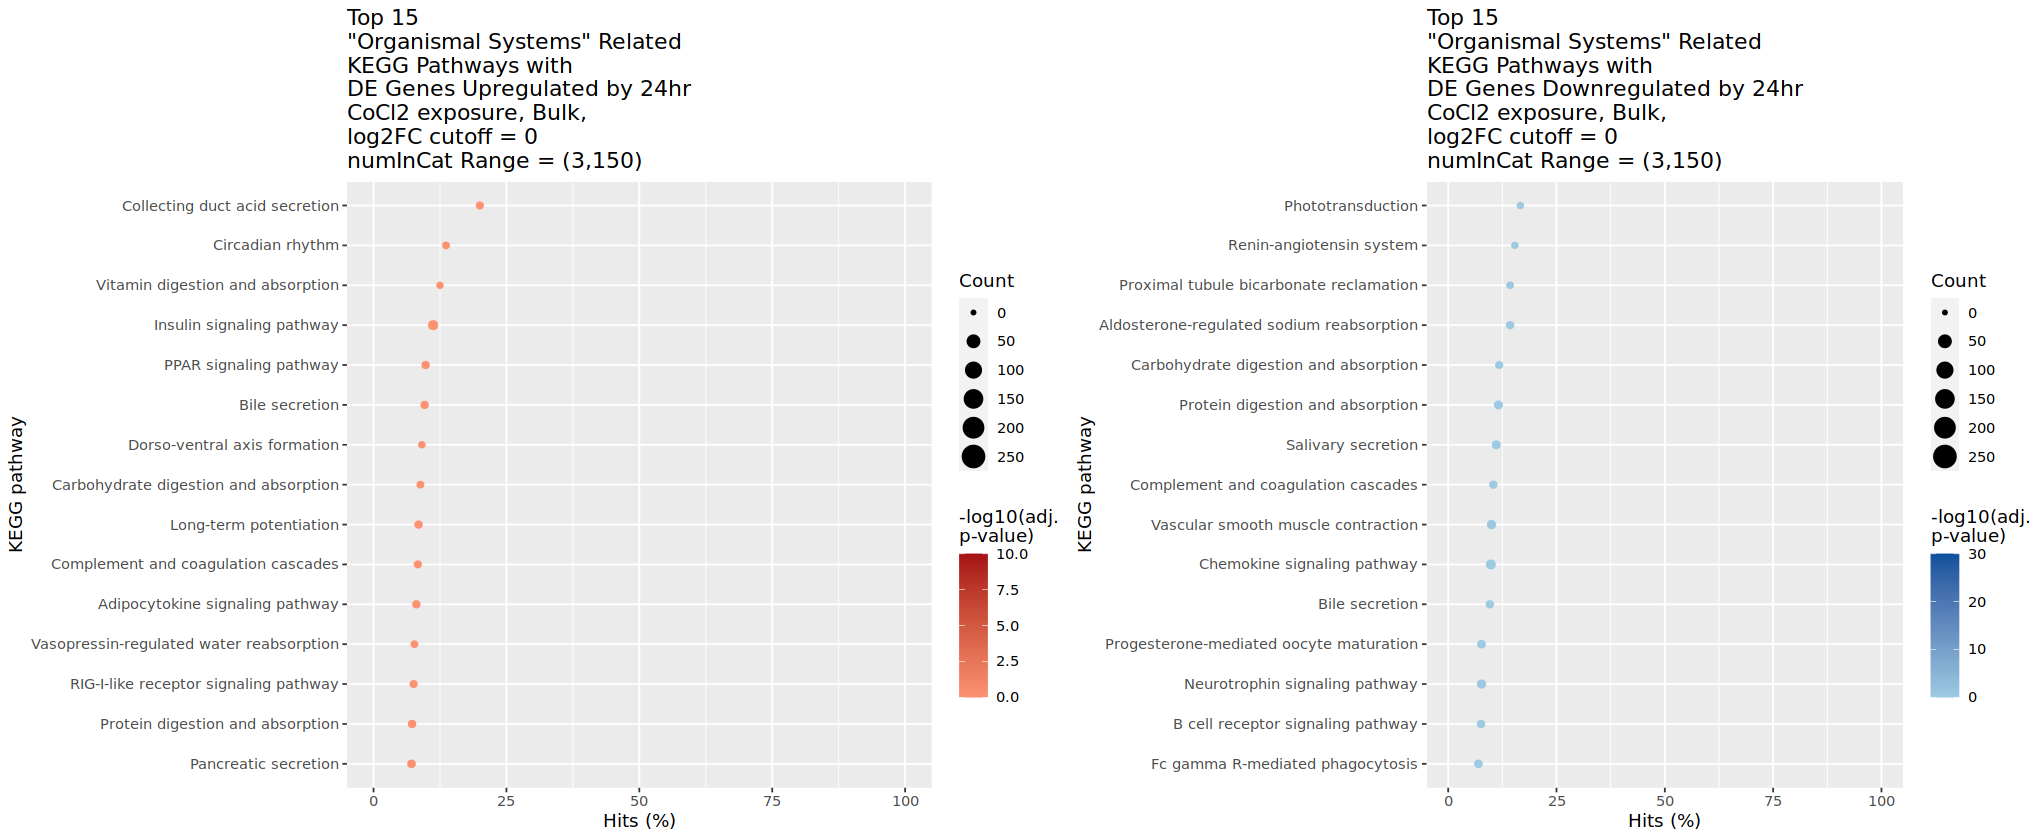

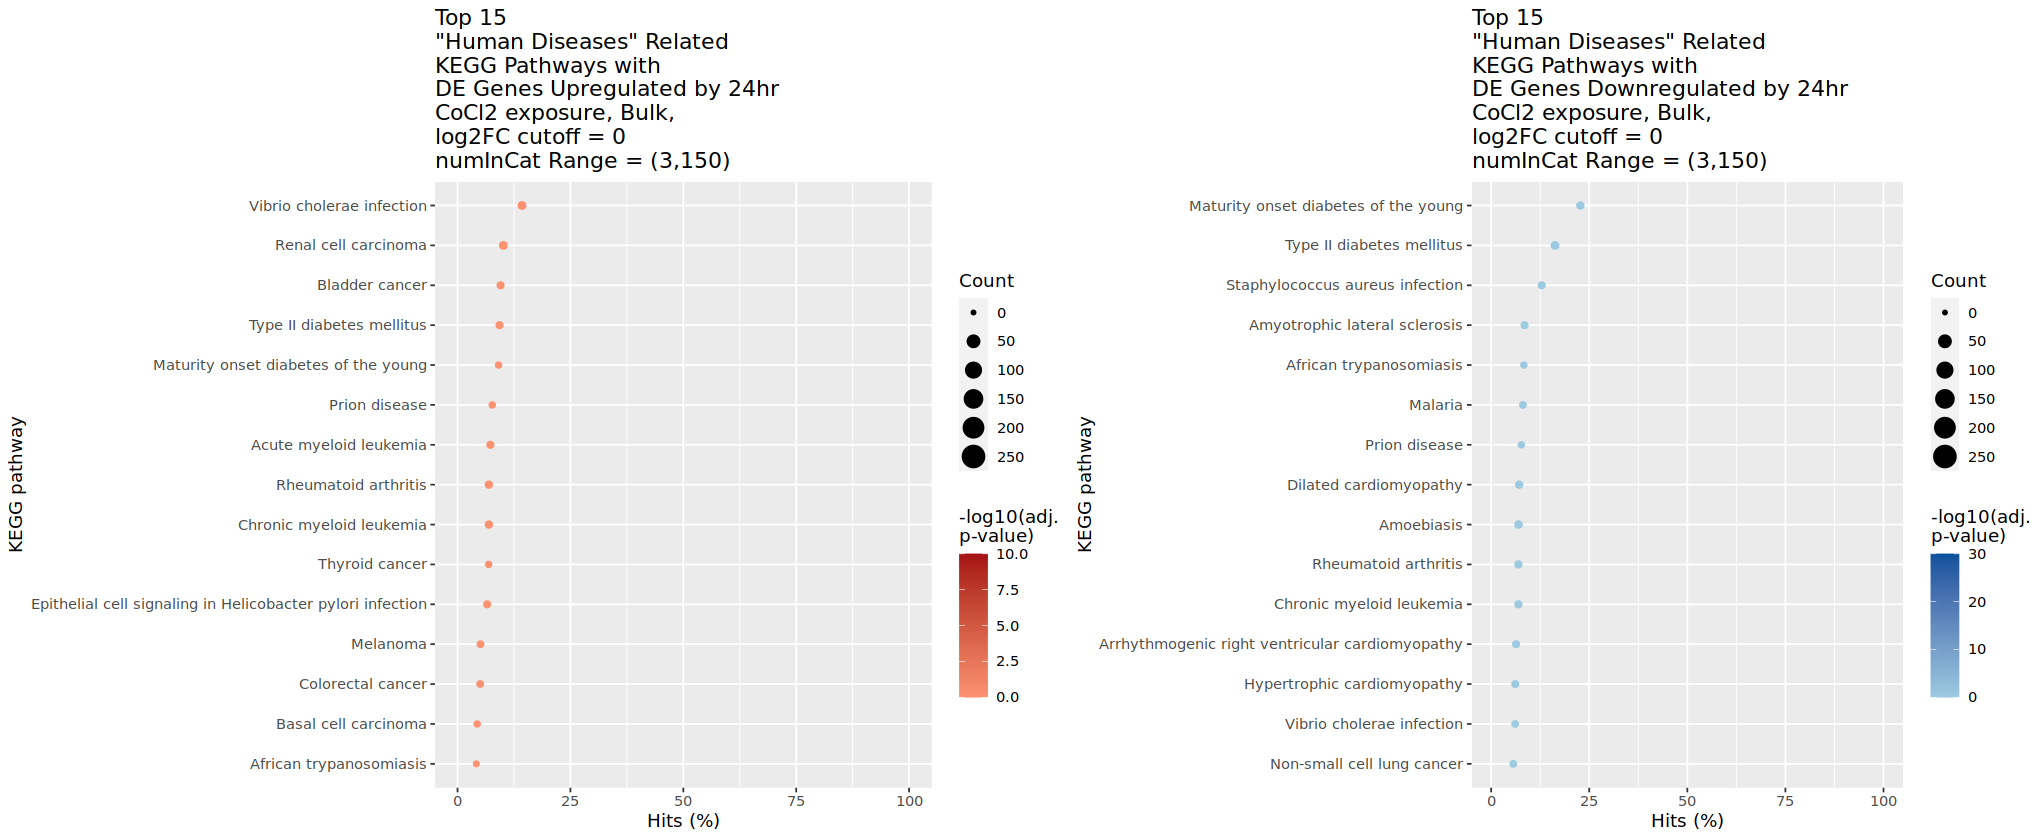

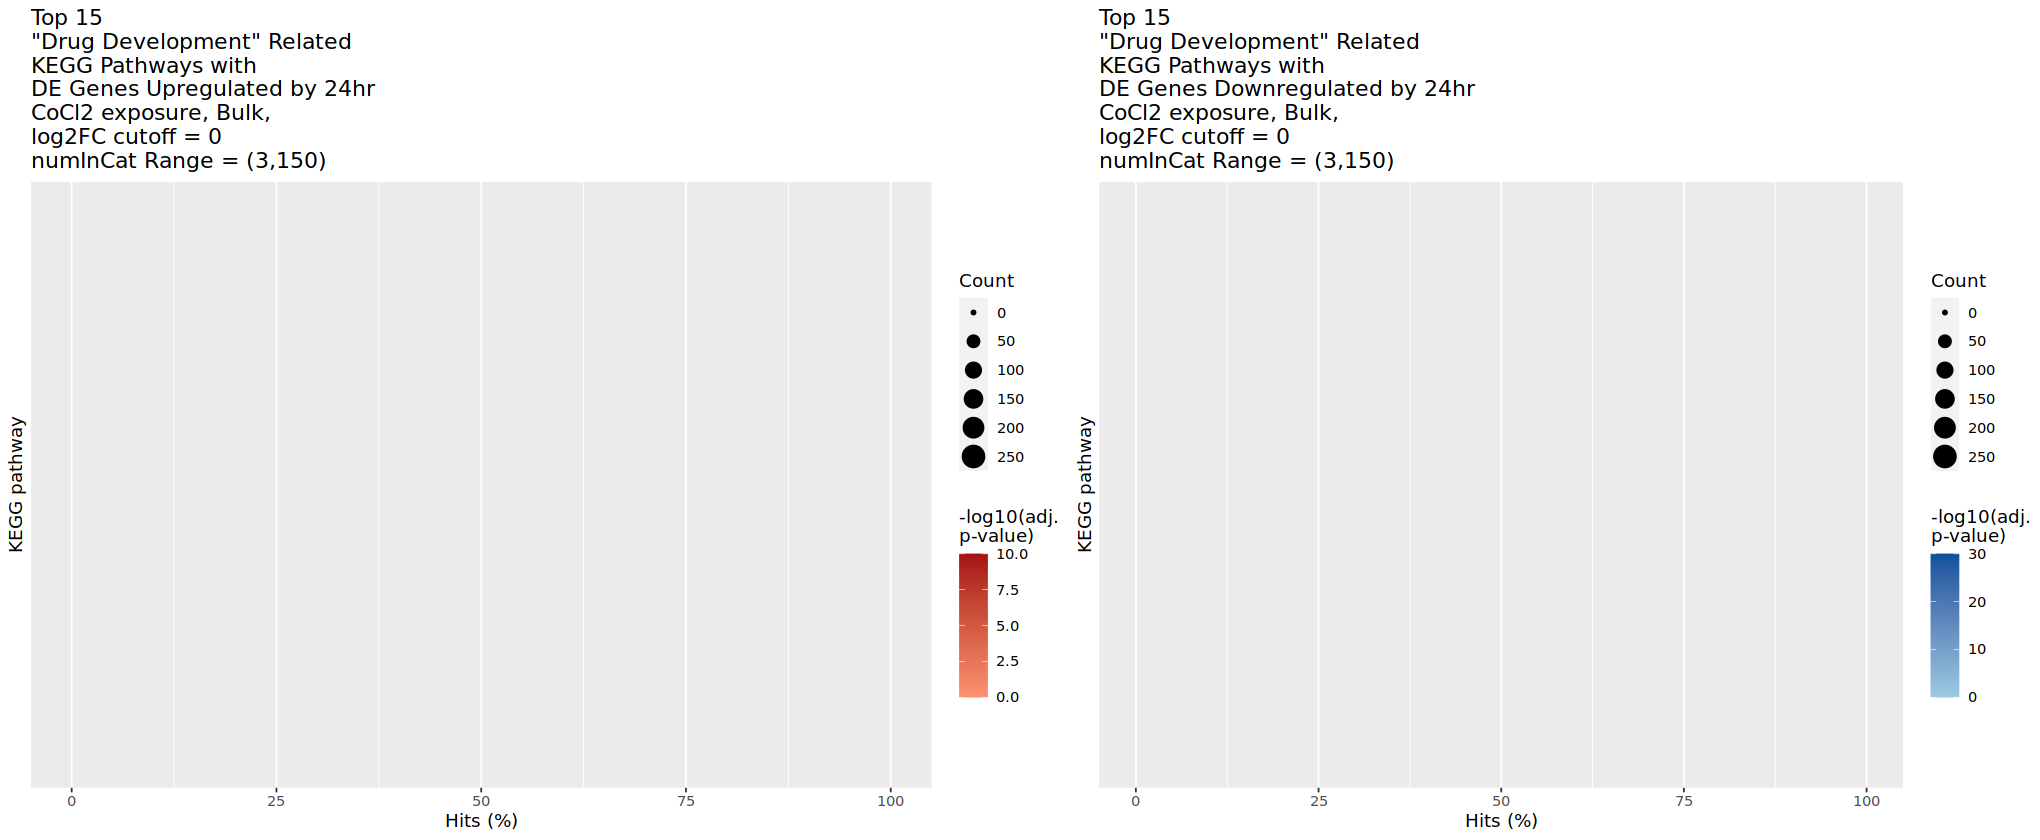

In [482]:



getGOTable <- function(TABLE_DE, removeTermsList){
    TABLE_DE$GENE_YES <- 1
    cocl2_genes = as.vector(TABLE_DE$GENE_YES)
    names(cocl2_genes) <- rownames(TABLE_DE)
    pwf_up.cocl2 = nullp(cocl2_genes,"hg38","geneSymbol", plot=F)    
    GO_up.cocl2 = goseq(pwf_up.cocl2,"hg38","geneSymbol", test.cats=c("GO:BP"))
    GO_up.cocl2$over_represented_pvalue[GO_up.cocl2$over_represented_pvalue==0]  <-  min(GO_up.cocl2$over_represented_pvalue[GO_up.cocl2$over_represented_pvalue>0])
    GO_up.cocl2 = subset(GO_up.cocl2, !category %in% removeTermsList)
    GO_up.cocl2 = subset(GO_up.cocl2, numInCat < 75)
    GO_up.cocl2$Bonferroni = -log(p.adjust(GO_up.cocl2$over_represented_pvalue, method="bonferroni"),10)
    GO_up.cocl2 = GO_up.cocl2[order(GO_up.cocl2$over_represented_pvalue, decreasing=F),]
    return(GO_up.cocl2)
}

plotGOTable <- function(GO_up.cocl2, celltype, regulateddir, PAL){
    tittl1 = paste(regulateddir, 'by 24hr \nCoCl2 exposure,', celltype)
    plot.up.cocl2 <- GO_up.cocl2 %>% 
        top_n(10, wt=Bonferroni) %>% 
        mutate(hitsPerc=numDEInCat*100/numInCat) %>% 
        ggplot(aes(x=hitsPerc, 
                   y=term, 
                   colour=Bonferroni, 
                   size=numDEInCat)) +
            scale_colour_gradient2(low=PAL[1], mid=PAL[3], high=PAL[6], limits=c(0,10), oob=scales::squish) + 
            geom_point() + 
            expand_limits(x=0) +
            labs(x="Hits (%)", y="GO term", colour="-log10 adj. p-value", size="Count") + 
            ggtitle(tittl1)
    return(plot.up.cocl2)
}




bulk_geneid <- listOfListsOfLists[['Bulk']][['Sig_Genes']]
rownames(bulk_geneid) <- bulk_geneid$ensembl_GENE_ID


bulk_geneid <- listOfListsOfLists[['Bulk']][['Sig_Genes']]
# rownames(bulk_geneid) <- bulk_geneid$ensembl_GENE_ID
bulk_geneid_list <- str_extract(as.character(unlist(bulk_geneid$ensembl_GENE_ID)), ".*(?=\\.)")
head(bulk_geneid_list)
# rownames(bulk_geneid) <- bulk_geneid_list
rownames(bulk_geneid)  = make.names(bulk_geneid_list,unique=TRUE)
head(bulk_geneid_list)
head(bulk_geneid)



# loads the ensembl to kegg pathway annotation list of lists from org.Hs.egPATH.
# code is from the goseq vignette
loadKegg <- function(){
     # Get the mapping from ENSEMBL 2 Entrez
    en2eg=as.list(org.Hs.egENSEMBL2EG)
     # Get the mapping from Entrez 2 KEGG
     eg2kegg=as.list(org.Hs.egPATH)
    # > # Define a function which gets all unique KEGG IDs
    # 20
     # associated with a set of Entrez IDs
     grepKEGG=function(id,mapkeys){unique(unlist(mapkeys[id],use.names=FALSE))}
     # Apply this function to every entry in the mapping from
     # ENSEMBL 2 Entrez to combine the two maps
    kegg <<- lapply(en2eg,grepKEGG,eg2kegg)
}

# uses goseq to generate a dataframe of gene ontology terms and associated representation within the query dataset
# takes a table of genes (as rownames) = ensembl gene IDs, padj = adjusted DEseq pvals,  log2FoldChange from DESeq
# assumes gene2cat object is loaded by loadKegg() and named "kegg" and is a list of lists, 
# where each element is a list of kegg pathway IDs and is named with an ensembl gene ID 
# also assumes kegg_anno = kegg annotation table (columns = c('PathwayID','Pathway_Name','Topic','Class')) is loaded
# returns dataframe with columns:
#                         'category','over_represented_pvalue',
#                         'under_represented_pvalue','numDEInCat',
#                         'numInCat','Bonferroni','PathwayID',
#                         'Pathway_Name','Topic','Class','hitsPerc'
getKeggPathway_Table <- function(TABLE, isUp, foldChangeCutoff){
    geneidDE =  na.omit(TABLE)
    bulk_geneid_list <- str_extract(as.character(unlist(geneidDE$ensembl_GENE_ID)), ".*(?=\\.)")
    rownames(geneidDE)  = make.names(bulk_geneid_list,unique=TRUE)
    if (isUp){
        geneidDE <- geneidDE %>%
          mutate(DEG = if_else(padj < 0.05 & log2FoldChange> (foldChangeCutoff), 1, 0))
    } else {
        geneidDE <- geneidDE %>%
          mutate(DEG = if_else(padj < 0.05 & log2FoldChange < (foldChangeCutoff), 1, 0))
    }
    testedGenesList = as.vector(geneidDE$DEG)
    names(testedGenesList) <- rownames(geneidDE)
    pwf = nullp(testedGenesList,"hg38","ensGene", plot=F)
    GO = goseq(pwf, gene2cat=kegg, test.cats = c("GO:MF","KEGG"))
    GO$over_represented_pvalue[GO$over_represented_pvalue==0]  <-  min(GO$over_represented_pvalue[GO$over_represented_pvalue>0])
    GO$Bonferroni = -log(p.adjust(GO$over_represented_pvalue, method="bonferroni"),10)
    GO = GO[order(GO$over_represented_pvalue, decreasing=F),]
    GO$hitsPerc <-   (GO$numDEInCat/GO$numInCat) * 100
    GO$PathwayID = GO$category
    kegg_anno_subset <- kegg_anno[which(kegg_anno$PathwayID %in% GO$PathwayID),]
    GO <- GO %>% right_join(kegg_anno_subset, by=c("PathwayID"))
    colnames(GO) <- c('category','over_represented_pvalue','under_represented_pvalue',
                      'numDEInCat','numInCat','Bonferroni', 'hitsPerc', 'PathwayID','Pathway_Name','Topic','Class')
    return(GO)
}




# uses goseq to generate a table of gene ontology terms and associated representation within the query dataset
# takes a list of dataframes. each dataframe, named with celltype, has names of genes (as rownames) = ensembl gene IDs,
# padj = adjusted DEseq pvals,  log2FoldChange from DESeq
# also requires:
# celltypes = names for the list of dataframes
# upCutoff = log2foldchange cutoff for labelling upregulated genes
# downCutoff =  = log2foldchange cutoff for labelling downregulated genes
# upperLimit_numInCat = maximum number of genes allowed for each pathway 
# lowerLimit_numInCat = maximum number of genes allowed for each pathway 
# min_numDEInCat = minumum number of DE genes for pathways in filtered table
# assumes gene2cat object is loaded by loadKegg() and named "kegg" and is a list of lists, 
# where each element is a list of kegg pathway IDs and is named with an ensembl gene ID 
# input example:
# deSeqResults[[c('Beta', 'Alpha')]] = list of dataframes
# deSeqResults[['Beta']] = dataframe
#   dataframe with rownames = ensembl gene Id , columns = c('baseMean',
#                                                         'log2FoldChange','lfcSE','stat','pvalue',
#                                                         'padj','ensembl_GENE_ID','Gene_Symbol')
# returns list of lists of dataframes, one list of list for each celltype
#   inner lists: 
#     'UP' = pathways enriched with respect to upregulated genes
#     'DOWN' = pathways enriched with respect to downregulated genes
#     'UP_filt_numInCat' = dataframe, 'UP', but filtered for pathways with the accepted number of genes, based on cutoffs
#     'DOWN_filt_numInCat' = dataframe, 'DOWN', but filtered for pathways with the accepted number of genes, based on cutoffs
#        each dataframe has columns:
#                         'category','over_represented_pvalue',
#                         'under_represented_pvalue','numDEInCat',
#                         'numInCat','Bonferroni','PathwayID',
#                         'Pathway_Name','Topic','Class','hitsPerc'
getKeggPathway_Tables_withSubset <- function(TABLES, cellTypes, upCutoff, downCutoff, upperLimit_numInCat, lowerLimit_numInCat, min_numDEInCat ){
    GOs = list()
    for (cell in cellTypes){
        GOs[[cell]] = list()
        print(paste(cell, 'UP'))
        GOs[[cell]][['UP']] = getKeggPathway_Table(TABLES[[cell]], isUp = TRUE, upCutoff)
        print(paste(cell, 'DOWN'))
        GOs[[cell]][['DOWN']] = getKeggPathway_Table(TABLES[[cell]], isUp = FALSE, downCutoff)
        GOs[[cell]][['UP_filt_numInCat']] = subset(GOs[[cell]][['UP']], numInCat <= upperLimit_numInCat & numInCat>=lowerLimit_numInCat)
        GOs[[cell]][['DOWN_filt_numInCat']] = subset(GOs[[cell]][['DOWN']], numInCat <= upperLimit_numInCat & numInCat>=lowerLimit_numInCat)
        GOs[[cell]][['UP_filt_numInCat']] = subset(GOs[[cell]][['UP_filt_numInCat']], numDEInCat >=  min_numDEInCat)
        GOs[[cell]][['DOWN_filt_numInCat']] = subset(GOs[[cell]][['DOWN_filt_numInCat']], numDEInCat >= min_numDEInCat)
    }
    return (GOs)
}

furtherFilter_GO_Tables <- function (GOs, celltypes, superclasses ){
    
    GOs_subsets <- list()
    for (cell in celltypes){
        GOs_subsets[[cell]] = list()
        print(paste(cell, 'UP'))
        
        upfilt <- GOs[[cell]][['UP_filt_numInCat']]
        downfilt <- GOs[[cell]][['DOWN_filt_numInCat']]
        
        
        for (topic in superclasses){
            concategory_up = paste0('UP_filt_',topic)
            concategory_down = paste0('DOWN_filt_',topic)
            
            GOs_subsets[[cell]][[concategory_up]] = subset(upfilt, Topic %in% c(topic))
            GOs_subsets[[cell]][[concategory_down]] = subset(downfilt, Topic %in% c(topic))
            
        }
    return(GOs_subsets)
    }
}



makeKEGG_plots_updown <- function(GO_Tables_ct_up, GO_Tables_ct_down, upTitle, downTitle, numTerms){
    GO_Table_up = GO_Tables_ct_up
    GO_Table_down = GO_Tables_ct_down
    GO_Table_up = GO_Table_up[order(GO_Table_up$Bonferroni, decreasing = FALSE),]
    GO_Table_down = GO_Table_down[order(GO_Table_down$Bonferroni, decreasing = FALSE ),]
    
    if (length(rownames(GO_Table_up)) > numTerms){
        GO_Table_up = GO_Table_up[1:numTerms,]
    }else{
        GO_Table_up = GO_Table_up
    }
    
    
    if (length(rownames(GO_Table_down)) > numTerms){
        GO_Table_down = GO_Table_down[1:numTerms,]
    }else{
        GO_Table_down = GO_Table_down
    }
    
    GO_Table_up$hitsPerc_opp = 1-GO_Table_up$hitsPerc
    GO_Table_down$hitsPerc_opp = 1-GO_Table_down$hitsPerc
    GO_Table_up = GO_Table_up[order(GO_Table_up$hitsPerc, decreasing = TRUE),]
    GO_Table_down = GO_Table_down[order(GO_Table_down$hitsPerc, decreasing = TRUE),]
    
#     print(head(GO_Table_up))
    
    
    plotList = list()
    plot.up.cocl2 <- GO_Table_up %>% 
        ggplot(aes(x= hitsPerc, 
                   y= reorder(Pathway_Name, -hitsPerc_opp), 
                   colour=Bonferroni, 
                   size=numDEInCat)) +
            scale_colour_gradient2(low=up.pal[1], mid=up.pal[3], high=up.pal[6], limits=c(0,10), oob=scales::squish) + 
            geom_point() + 
            expand_limits(x=0) +
            labs(x="Hits (%)", y="KEGG pathway", colour="-log10(adj.\np-value)", size="Count") + 
            ggtitle(upTitle)
    
    plot.down.cocl2 <- GO_Table_down %>% 
        ggplot(aes(x= hitsPerc, 
                   y= reorder(Pathway_Name, -hitsPerc_opp), 
                   colour=Bonferroni, 
                   size=numDEInCat)) +
            scale_colour_gradient2(low=down.pal[1], mid=down.pal[3], high=down.pal[6], limits=c(0,30), oob=scales::squish) + 
            geom_point() + 
            expand_limits(x=0) +
            labs(x="Hits (%)", y="KEGG pathway", colour="-log10(adj.\np-value)", size="Count") + 
            ggtitle(downTitle)

    plotList[['UP']] = plot.up.cocl2
    plotList[['DOWN']] = plot.down.cocl2
    return(plotList)
}


topics <- unique(kegg_anno$Topic)
tables1 = list()
tables1[['Bulk']] = listOfListsOfLists[['Bulk']][['All_Genes']]
GOs1 <- getKeggPathway_Tables_withSubset(TABLES = tables1, cellTypes = c('Bulk'), 0, 0, 150, 3, 1 )



GOs1_subsets <- furtherFilter_GO_Tables(GOs = GOs1, celltypes = c('Bulk'), superclasses = topics) 



plots_celltypes = list()
plots_celltypes[['Zero_Cutoff']] = list()
plots_celltypes[['Zero_Cutoff']][['Bulk']] <- makeKEGG_plots_updown(GOs1[['Bulk']][['UP_filt_numInCat']],
                                                                    GOs1[['Bulk']][['DOWN_filt_numInCat']], 
                                  "Upregulated by 24hr \nCoCl2 exposure, Bulk, log2FC cutoff = 0", 
                                  "Downregulated by 24hr \nCoCl2 exposure, Bulk, log2FC cutoff = 0", 15)

# "Upregulated by 24hr \nCoCl2 exposure, Bulk, log2FC cutoff = 0"
# "Downregulated by 24hr \nCoCl2 exposure, Bulk, log2FC cutoff = 0"




plot.up.cocl2_2 <- plots_celltypes[['Zero_Cutoff']][['Bulk']][['UP']] + xlim(0,100) + scale_size(range = c(1, 6), limits=c(0,250)) 
plot.down.cocl2_2 <- plots_celltypes[['Zero_Cutoff']][['Bulk']][['DOWN']] + xlim(0,100) + scale_size(range = c(1, 6), limits=c(0,250)) 
    
options(repr.plot.width=15, repr.plot.height=8)
ggarrange(plot.up.cocl2_2, plot.down.cocl2_2, widths=c(1.1,1))

cellTypes1 = c('Bulk')
lfcCutoff = '0'
numberOfTermsToPlot = 15
numInCat_max = 150
numInCat_min =  3
plots_celltypes_subsets = list()

                                        
                                        
for (cell in cellTypes1){              
    plots_celltypes_subsets[[cell]] = list()
    for (topic in topics){
        print(paste(cell, topic))
        upTitle = paste0("Top ", numberOfTermsToPlot, "\n\"", topic, "\" ", "Related \nKEGG Pathways with \nDE Genes Upregulated by 24hr \nCoCl2 exposure, ",
                       cell, ', \nlog2FC cutoff = ', lfcCutoff, ' \nnumInCat Range = (', numInCat_min, ',', numInCat_max, ')'  )
        downTitle = paste0("Top ", numberOfTermsToPlot, "\n\"", topic, "\" ", "Related \nKEGG Pathways with \nDE Genes Downregulated by 24hr \nCoCl2 exposure, ",
                       cell, ', \nlog2FC cutoff = ', lfcCutoff, ' \nnumInCat Range = (', numInCat_min, ',', numInCat_max, ')'  )

        concategory_up = paste0('UP_filt_',topic)
        concategory_down = paste0('DOWN_filt_',topic)
        
        plots_celltypes_subsets[[cell]][[topic]] <- makeKEGG_plots_updown(GOs1_subsets[[cell]][[concategory_up]], 
                                                                        GOs1_subsets[[cell]][[concategory_down]],
                                                                      upTitle, 
                                                                      downTitle, numberOfTermsToPlot)
        
        
        plots_celltypes_subsets[[cell]][[topic]][['UP']] <- plots_celltypes_subsets[[cell]][[topic]][['UP']] + xlim(0,100) + scale_size(range = c(1, 6), limits=c(0,250)) 
        plots_celltypes_subsets[[cell]][[topic]][['DOWN']] <- plots_celltypes_subsets[[cell]][[topic]][['DOWN']] + xlim(0,100) + scale_size(range = c(1, 6), limits=c(0,250)) 
    
        
    }
}

options(repr.plot.width=17, repr.plot.height=7)

for (cell in cellTypes1){              
    for (topic in topics){
        
        print(ggarrange( plots_celltypes_subsets[[cell]][[topic]][['UP']] ,  plots_celltypes_subsets[[cell]][[topic]][['DOWN']], widths=c(1.1,1)))
        
        
    }
}


